# IMPORTED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("product.csv")
df.head(3)

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,December,Morning,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,December,Morning,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,December,Morning,Wednesday


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522684 entries, 0 to 522683
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     522684 non-null  int64  
 1   StockCode     522684 non-null  object 
 2   Product       522684 non-null  object 
 3   Quantity      522684 non-null  int64  
 4   InvoiceDate   522684 non-null  object 
 5   UnitPrice     522684 non-null  float64
 6   CustomerID    522684 non-null  int64  
 7   Country       522684 non-null  object 
 8   TotalSales    522684 non-null  float64
 9   Year          522684 non-null  int64  
 10  Quarter       522684 non-null  int64  
 11  Month         522684 non-null  object 
 12  Period        522684 non-null  object 
 13  Days_of_Week  522684 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 55.8+ MB


# PRODUCT CLUSTERING ANALYSIS

# Calculating The Average Selling Point

In [4]:
#Aveerage Selling Price to boost clustering
df['ASP'] = df['TotalSales'] / df['Quantity']

# Grouping The Product By Features

In [5]:
#Summing features By Products
product_df = df.groupby("Product")[["Quantity","TotalSales","ASP"]].sum().reset_index()
product_df.head()

,Product,Quantity,TotalSales,ASP
0,4 PURPLE FLOCK DINNER CANDLES,142,285.70,95.57
1,50'S CHRISTMAS GIFT BAG LARGE,1915,2343.63,184.03
2,DOLLY GIRL BEAKER,2451,2886.25,265.13
3,I LOVE LONDON MINI BACKPACK,388,1624.02,401.65
4,I LOVE LONDON MINI RUCKSACK,1,4.15,4.15


# Standardizing The Features

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(product_df[["TotalSales", "Quantity","ASP"]])

# Finding The Optimal K Using Elbow Method

In [7]:
# Finding the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Checking for clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


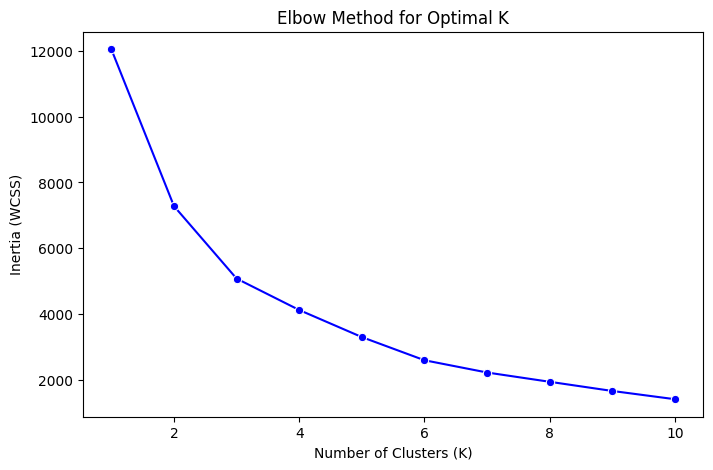

In [8]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=K_range, y=inertia, marker="o", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Applying K-Means Clustering

In [9]:
optimal_k = 3  # Replace with the best K from the elbow method

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
product_df["Cluster"] = kmeans.fit_predict(X_scaled)

In [10]:
product_df["Cluster"].value_counts()

Cluster
0    3718
1     290
2       8
Name: count, dtype: int64

# Classifying Products

In [11]:
# Defining a function to classify Products 
def classify_product(cluster):
    if cluster == 0:
        return "Low-Value Product"
    elif cluster == 1:
        return "Moderate-Value Product"
    else:
        return "Best-Selling Product"

product_df["Classification"] = product_df["Cluster"].apply(classify_product)

In [12]:
product_df["Classification"].value_counts()

Classification
Low-Value Product         3718
Moderate-Value Product     290
Best-Selling Product         8
Name: count, dtype: int64

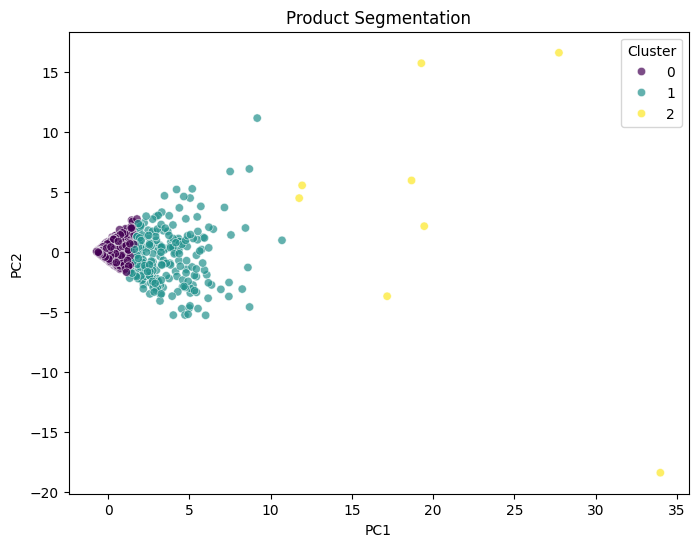

In [15]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the reduced features
pca_df = pd.DataFrame(data=pca_components, columns=["PC1", "PC2"])
pca_df["Cluster"] = kmeans.labels_  # Assign cluster labels

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", alpha=0.7)
plt.title("Product Segmentation")
plt.legend(title="Cluster")
plt.show()

# Best Selling Products

In [13]:
best_selling = product_df[product_df['Classification'] == 'Best-Selling Product']
best_selling

,Product,Quantity,TotalSales,ASP,Cluster,Classification
226,ASSORTED COLOUR BIRD ORNAMENT,36362,58927.62,2542.52,2,Best-Selling Product
1807,JUMBO BAG RED RETROSPOT,48371,94159.81,5243.39,2,Best-Selling Product
2043,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92,367.12,2,Best-Selling Product
2378,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,2.08,2,Best-Selling Product
2404,PARTY BUNTING,18283,99445.23,9850.68,2,Best-Selling Product
2731,RABBIT NIGHT LIGHT,30739,66870.03,2426.97,2,Best-Selling Product
2843,REGENCY CAKESTAND 3 TIER,13851,174156.54,28065.76,2,Best-Selling Product
3834,WHITE HANGING HEART T-LIGHT HOLDER,37872,106236.72,7437.57,2,Best-Selling Product


# Grouping The Best Selling Products

In [14]:
best_selling = best_selling.groupby("Product")[["TotalSales","Quantity"]].sum()
best_selling = best_selling.sort_values(by = "TotalSales",ascending= False)
best_selling

,TotalSales,Quantity
Product,,
REGENCY CAKESTAND 3 TIER,174156.54,13851
"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995
WHITE HANGING HEART T-LIGHT HOLDER,106236.72,37872
PARTY BUNTING,99445.23,18283
JUMBO BAG RED RETROSPOT,94159.81,48371
MEDIUM CERAMIC TOP STORAGE JAR,81700.92,78033
RABBIT NIGHT LIGHT,66870.03,30739
ASSORTED COLOUR BIRD ORNAMENT,58927.62,36362


# Best Selling Product Visual

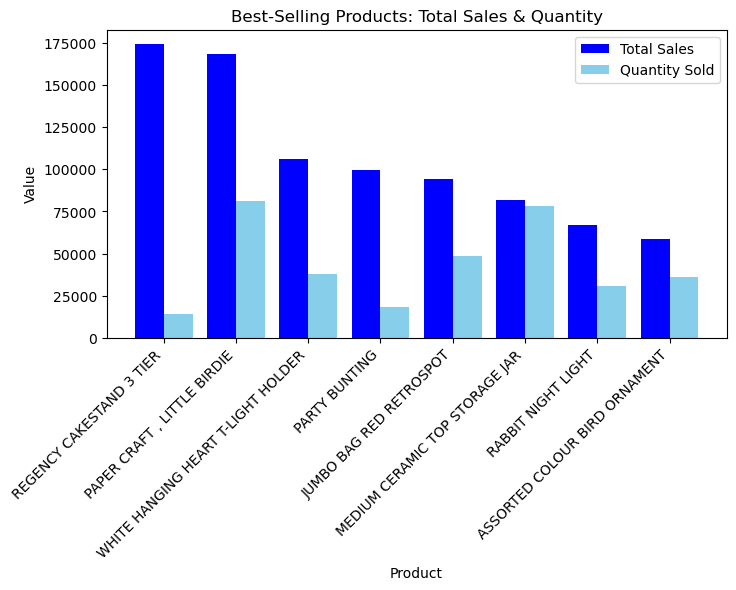

In [72]:
# Set positions for bars
x = np.arange(len(best_selling.index)) 
width = 0.4  # Width of the bars

# Create figure
fig, ax = plt.subplots(figsize=(8,4))

# Bar plot for Total Sales
bars1 = ax.bar(x - width/2, best_selling["TotalSales"], width, label="Total Sales", color="blue")

# Bar plot for Quantity Sold
bars2 = ax.bar(x + width/2, best_selling["Quantity"], width, label="Quantity Sold", color="skyblue")

# Add labels
ax.set_xlabel("Product")
ax.set_ylabel("Value")
ax.set_title("Best-Selling Products: Total Sales & Quantity")
ax.set_xticks(x)
ax.set_xticklabels(best_selling.index, rotation=45, ha="right") 
ax.legend()

# Show plot
plt.show()

# High Value Products

In [74]:
high_value = product_df[product_df['Classification'] == 'High-Value Product']
high_value.head()

,Product,Quantity,TotalSales,ASP,Cluster,Classification
9,SPACEBOY BABY GIFT SET,498,7741.75,2928.07,1,High-Value Product
32,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1359,10910.61,2447.73,1,High-Value Product
49,3 HOOK PHOTO SHELF ANTIQUE WHITE,1794,13611.81,3827.94,1,High-Value Product
56,3 TIER CAKE TIN GREEN AND CREAM,445,6981.67,3757.02,1,High-Value Product
57,3 TIER CAKE TIN RED AND CREAM,689,9765.11,2901.72,1,High-Value Product


# Grouping The High Value Products

In [76]:
high_value = high_value.groupby("Product")[["TotalSales","Quantity"]].sum()
high_value = high_value.sort_values(by = "TotalSales",ascending= False)
high_value.head(10)

,TotalSales,Quantity
Product,,
PAPER CHAIN KIT 50'S CHRISTMAS,64875.59,19329
CHILLI LIGHTS,54096.36,10302
SPOTTY BUNTING,42513.48,8320
JUMBO BAG PINK POLKADOT,42401.01,21448
BLACK RECORD COVER FRAME,40633.38,11651
PICNIC BASKET WICKER 60 PIECES,39619.50,61
DOORMAT KEEP CALM AND COME IN,38133.64,5487
SET OF 3 CAKE TINS PANTRY DESIGN,38108.89,7483
JAM MAKING SET WITH JARS,37082.13,8695


# High Value Products Visual

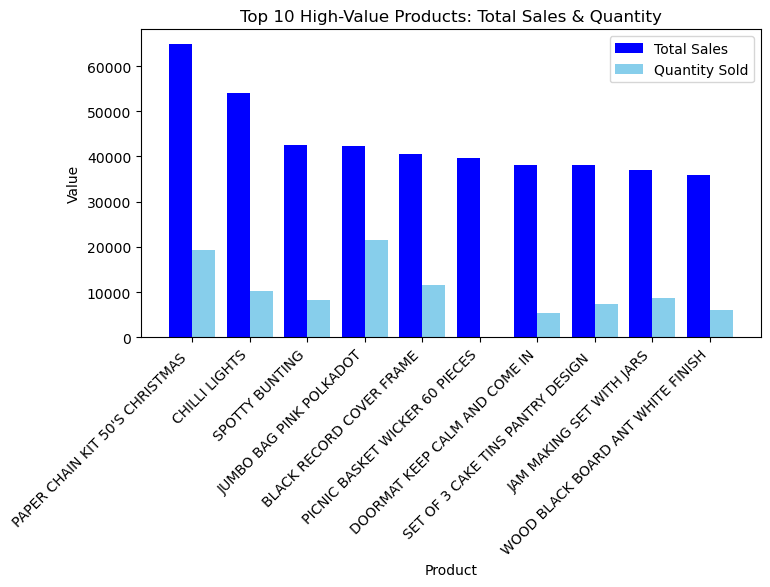

In [78]:
# Select the top 10 high-value products based on Total Sales
top_10_high_value = high_value.nlargest(10, "TotalSales") 

# Set positions for bars
x = np.arange(len(top_10_high_value.index))  # Product indices
width = 0.4  # Width of the bars

# Create figure
fig, ax = plt.subplots(figsize=(8, 4))

# Bar plot for Total Sales
bars1 = ax.bar(x - width/2, top_10_high_value["TotalSales"], width, label="Total Sales", color="blue")

# Bar plot for Quantity Sold
bars2 = ax.bar(x + width/2, top_10_high_value["Quantity"], width, label="Quantity Sold", color="skyblue")

# Add labels
ax.set_xlabel("Product")
ax.set_ylabel("Value")
ax.set_title("Top 10 High-Value Products: Total Sales & Quantity")
ax.set_xticks(x)
ax.set_xticklabels(top_10_high_value.index, rotation=45, ha="right")
ax.legend()

# Show plot
plt.show()

# Low Value Products

In [80]:
low_value = product_df[product_df['Classification'] == 'Low-Value Product']
low_value.head()

,Product,Quantity,TotalSales,ASP,Cluster,Classification
0,4 PURPLE FLOCK DINNER CANDLES,142,285.70,95.57,0,Low-Value Product
1,50'S CHRISTMAS GIFT BAG LARGE,1915,2343.63,184.03,0,Low-Value Product
2,DOLLY GIRL BEAKER,2451,2886.25,265.13,0,Low-Value Product
3,I LOVE LONDON MINI BACKPACK,388,1624.02,401.65,0,Low-Value Product
4,I LOVE LONDON MINI RUCKSACK,1,4.15,4.15,0,Low-Value Product


# Grouping The Low Value Products

In [82]:
low_value = low_value.groupby("Product")[["TotalSales","Quantity"]].sum()
low_value = low_value.sort_values(by = "TotalSales",ascending= False)
low_value.head(10)

,TotalSales,Quantity
Product,,
3 HEARTS HANGING DECORATION RUSTIC,11797.38,3413
JUMBO BAG PAISLEY PARK,11581.83,5020
REVOLVER WOODEN RULER,10373.99,5233
VINTAGE DOILY JUMBO BAG RED,10206.41,4802
LONDON BUS COFFEE MUG,10140.60,4334
ICE CREAM SUNDAE LIP GLOSS,9935.76,8076
WOODEN SCHOOL COLOURING SET,9741.57,5883
REGENCY MILK JUG PINK,9587.15,3160
PANTRY ROLLING PIN,9564.98,2464


## Low Value Product Visual

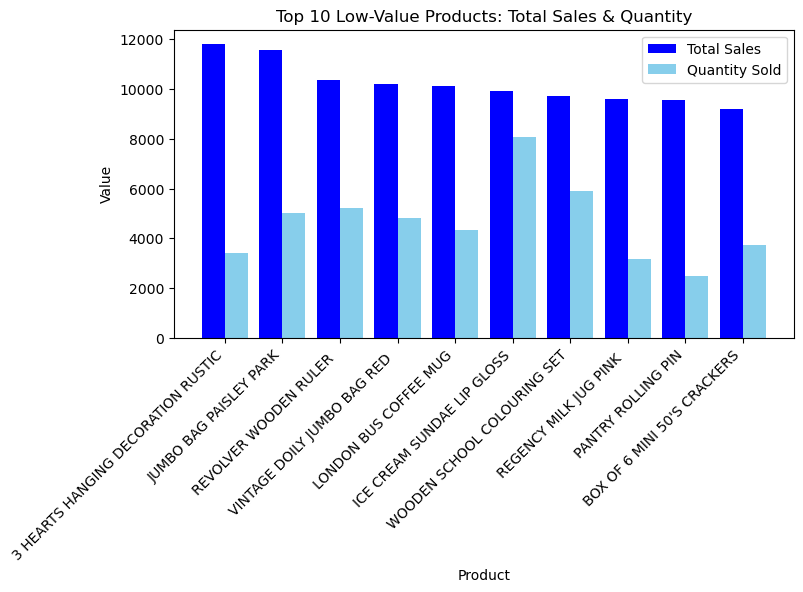

In [84]:
# Select the top 10 low-value products based on Total Sales
top_10_low_value = low_value.nlargest(10, "TotalSales")  

# Set positions for bars
x = np.arange(len(top_10_low_value.index))  
width = 0.4  # Width of the bars

# Create figure
fig, ax = plt.subplots(figsize=(8, 4))  

# Bar plot for Total Sales
bars1 = ax.bar(x - width/2, top_10_low_value["TotalSales"], width, label="Total Sales", color="blue")

# Bar plot for Quantity Sold
bars2 = ax.bar(x + width/2, top_10_low_value["Quantity"], width, label="Quantity Sold", color="skyblue")

# Add labels
ax.set_xlabel("Product")
ax.set_ylabel("Value")
ax.set_title("Top 10 Low-Value Products: Total Sales & Quantity")
ax.set_xticks(x)
ax.set_xticklabels(top_10_low_value.index, rotation=45, ha="right") 

ax.legend()

# Show plot
plt.show()

# CUSTOMER CLUSTERING ANALSIS

In [86]:
import pandas as pd
dfc = pd.read_csv("Customercluster.csv")
dfc.head(3)

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Quarter,Month,Hour,Period,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers


# Grouping The Customer By Segment

In [88]:
customer_segment = dfc.groupby("Segment")["CustomerID"].count().reset_index()
customer_segment

,Segment,CustomerID
0,Frequent Buyers,426851
1,High-Value Customers,40534
2,Occasional Shoppers,55299


# Customer Clustering Analysis

/var/folders/1p/qf_yq_bx6g94bryf1jwlkmtr0000gp/T/ipykernel_7440/424831173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Segment", x="CustomerID", data=customer_segment, palette="viridis")


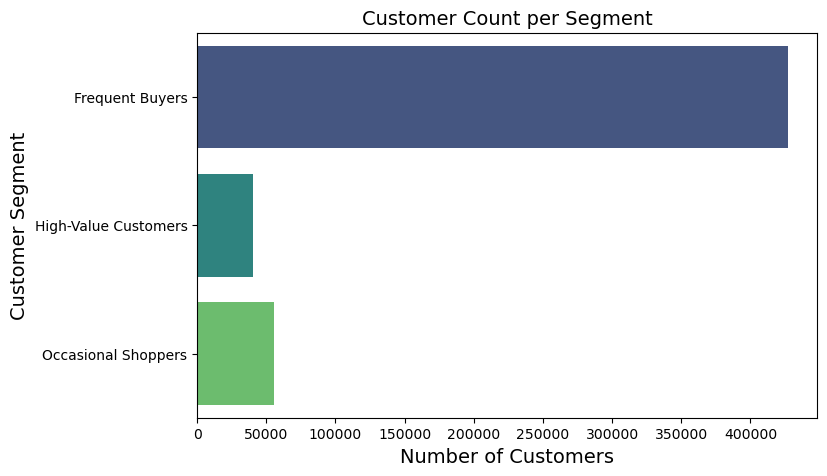

In [90]:
# Plot a horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(y="Segment", x="CustomerID", data=customer_segment, palette="viridis")

# Labels & Formatting
plt.xlabel("Number of Customers",fontsize=14)
plt.ylabel("Customer Segment",fontsize=14)
plt.title("Customer Count per Segment",fontsize=14)

# Show the plot
plt.show()